# Adverse Events Analysis

This analyisis has the purpose of investigating on the adverse events related to edible and non-edible products, occured in the United States over time.
The analysis will consider adverse events reports in different areas and for different categories, and the effects that the related medical conditions had on the subject.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os



In [9]:
df = pd.read_csv('../input/adverse-food-events/CAERS_ASCII_2004_2017Q2.csv')

## Data clean-up

In [10]:
df.duplicated('RA_Report #').value_counts()
df.drop_duplicates(['RA_Report #'],keep='last',inplace=True)

## Question 1: What are the most commonly reported foodstuffs?

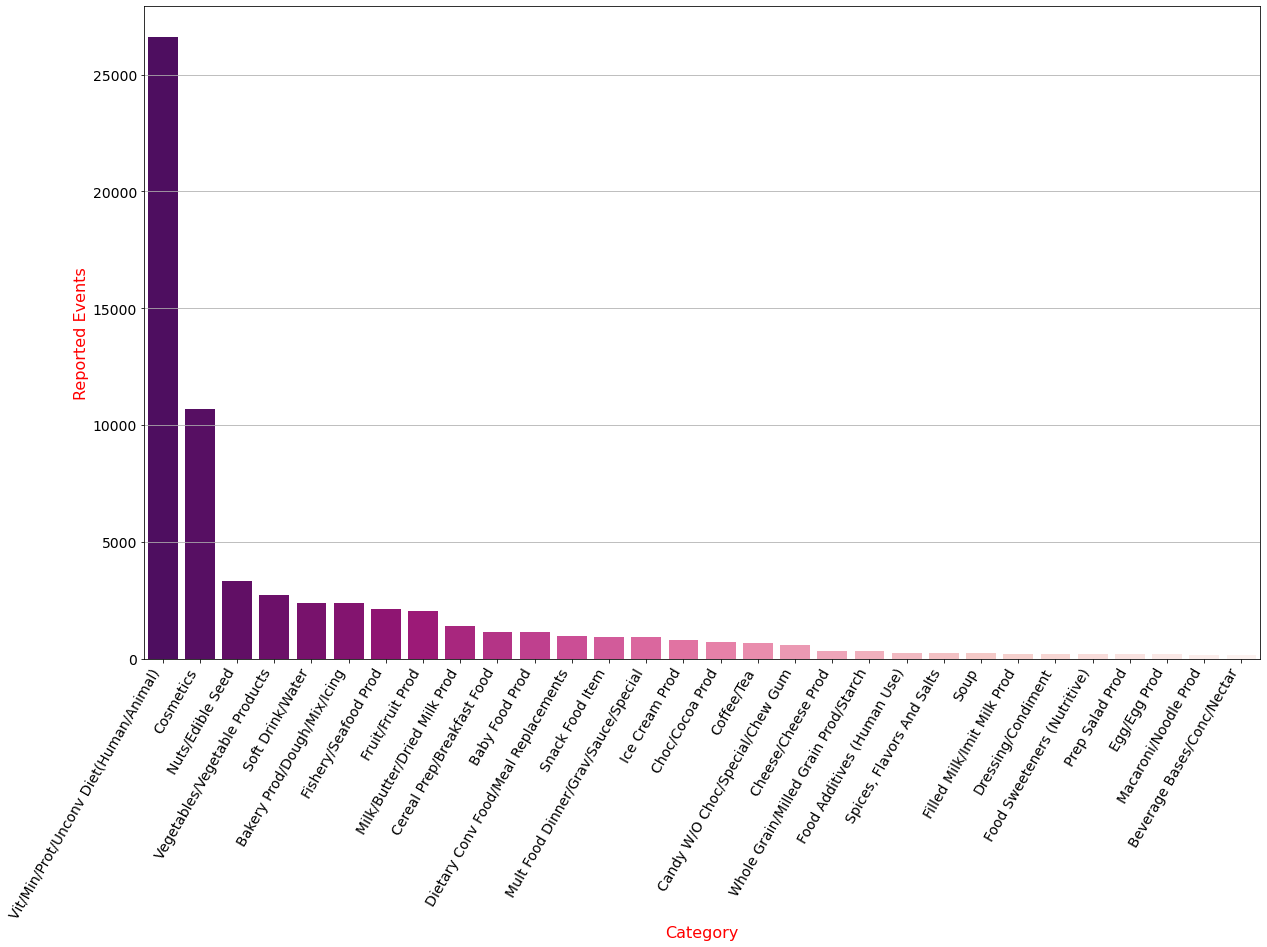

In [11]:
foodstuff = df['PRI_FDA Industry Name'].value_counts()
food_index = foodstuff.index
food_value = foodstuff.values
plt.figure(figsize=(20,12))
plt.grid()
food_plot = sns.barplot(x=food_index[:30],y=food_value[:30], palette = "RdPu_r")
plt.xticks(rotation=60, ha='right', size=14)
plt.yticks(size=14)
plt.xlabel('Category', size=16, color='r')
plt.ylabel('Reported Events', size=16, color='r')
plt.show()

## Question 2: What's the Product Role Distribution?

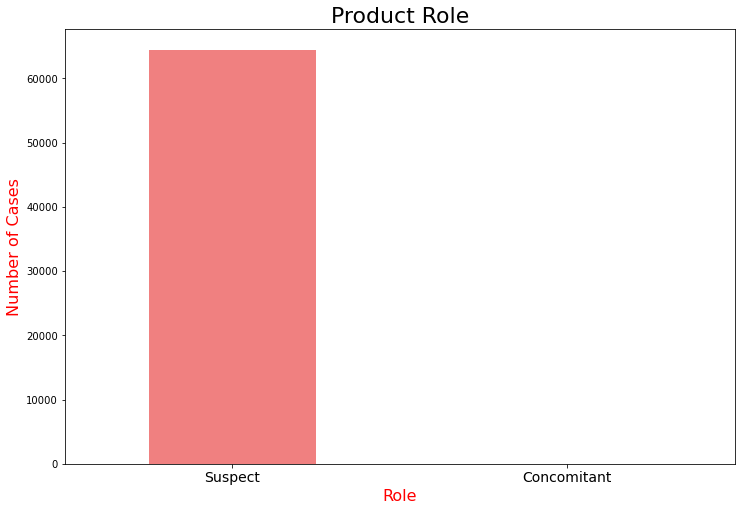

In [12]:
plt.figure(figsize=(12,8))

colors= ['lightcoral', 'lightblue']
explode= [0, 0.2]
df['PRI_Product Role'].value_counts().plot.bar(color=colors)
plt.xticks(size=14, rotation='horizontal')
plt.xlabel('Role', size=16, color='r')
plt.ylabel('Number of Cases', size=16, color='r')
plt.title('Product Role', size=22)
plt.show()

## Question 3: What are the most commonly reported medical conditions?

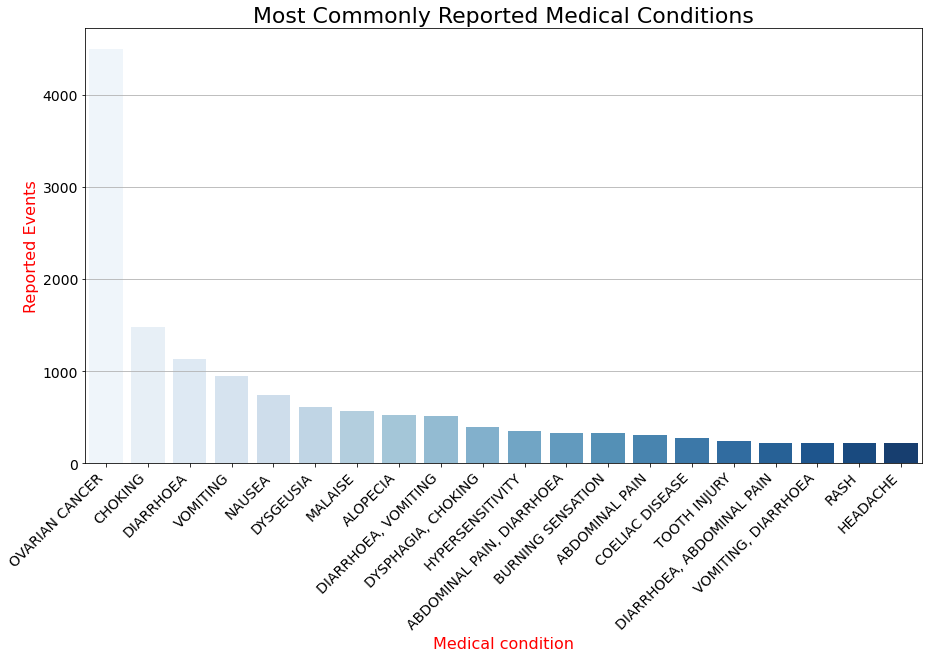

In [13]:
symptoms = df['SYM_One Row Coded Symptoms'].value_counts()
symptom_index = symptoms.index
symptom_value = symptoms.values
plt.figure(figsize=(15,8))
plt.grid()
symptom_plot = sns.barplot(x=symptom_index[:20],y=symptom_value[:20], palette = "Blues")
plt.xticks(rotation=45, ha='right', size=14)
plt.yticks(size=14)
plt.xlabel('Medical condition', size=16, color='r')
plt.ylabel('Reported Events', size=16,color='r')
plt.title('Most Commonly Reported Medical Conditions', size=22)
plt.show()

## Question 4: What are the most commonly reported outcomes?

In [14]:
non_serious_count = 0
hc_count = 0
er_count = 0
hosp_count = 0
death_count = 0
serious_count = 0
dis_count = 0



for i in df['AEC_One Row Outcomes']:
    if 'NON-SERIOUS INJURIES/ ILLNESS'in i:
        non_serious_count += 1
    if 'VISITED A HEALTH CARE PROVIDER'in i:
        hc_count += 1
    if 'VISITED AN ER'in i:
        er_count += 1
    if 'HOSPITALIZATION'in i:
        hosp_count += 1
    if 'DEATH'in i:
        death_count += 1
    if 'SERIOUS INJURIES/ ILLNESS'in i:
        serious_count += 1
    if 'DISABILITY'in i:
        dis_count += 1


In [15]:
print('NON-SERIOUS INJURIES/ ILLNESS percentage: {}%'.format(round(non_serious_count/len(df),3)*100))
print('VISITED A HEALTH CARE PROVIDER percentage: {}%'.format(round(hc_count/len(df),3)*100))
print('VISITED AN ER percentage: {}%'.format(round(er_count/len(df),3)*100))
print('HOSPITALIZATION percentage: {}%'.format(round(hosp_count/len(df),1)*100))
print('DEATH percentage: {}%'.format(round(death_count/len(df),3)*100))
print('SERIOUS INJURIES/ ILLNESS percentage: {}%'.format(round(serious_count/len(df),1)*100))
print('DISABILITY percentage: {}%'.format(round(dis_count/len(df),3)*100))

NON-SERIOUS INJURIES/ ILLNESS percentage: 37.4%
VISITED A HEALTH CARE PROVIDER percentage: 20.8%
VISITED AN ER percentage: 12.4%
HOSPITALIZATION percentage: 10.0%
DEATH percentage: 2.7%
SERIOUS INJURIES/ ILLNESS percentage: 40.0%
DISABILITY percentage: 2.4%


In [16]:
data = {'VISITED AN ER':hosp_count, 'VISITED A HEALTH CARE PROVIDER':hc_count, 'HOSPITALIZATION':hosp_count,
     'NON-SERIOUS INJURIES/ ILLNESS':non_serious_count,
     'SERIOUS INJURIES/ ILLNESS':serious_count,
     'DEATH':death_count,
     'DISABILITY':dis_count}

outcomesDF = pd.Series(data=data)

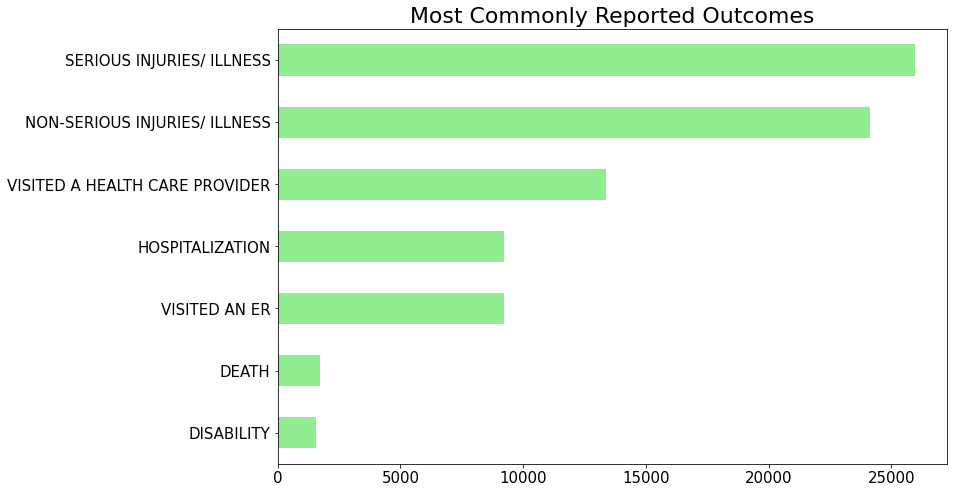

SERIOUS INJURIES/ ILLNESS         25974
NON-SERIOUS INJURIES/ ILLNESS     24144
VISITED A HEALTH CARE PROVIDER    13397
HOSPITALIZATION                    9221
VISITED AN ER                      9221
DEATH                              1728
DISABILITY                         1567
dtype: int64


In [17]:
plt.figure(figsize=(12,8))
outcomesDF.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Most Commonly Reported Outcomes',fontsize=22)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print(outcomesDF.sort_values(ascending=False))

## Adverse Events Over Time

In [18]:
df['year'] = pd.DatetimeIndex(df['AEC_Event Start Date']).year
df['month'] = pd.DatetimeIndex(df['RA_CAERS Created Date']).month

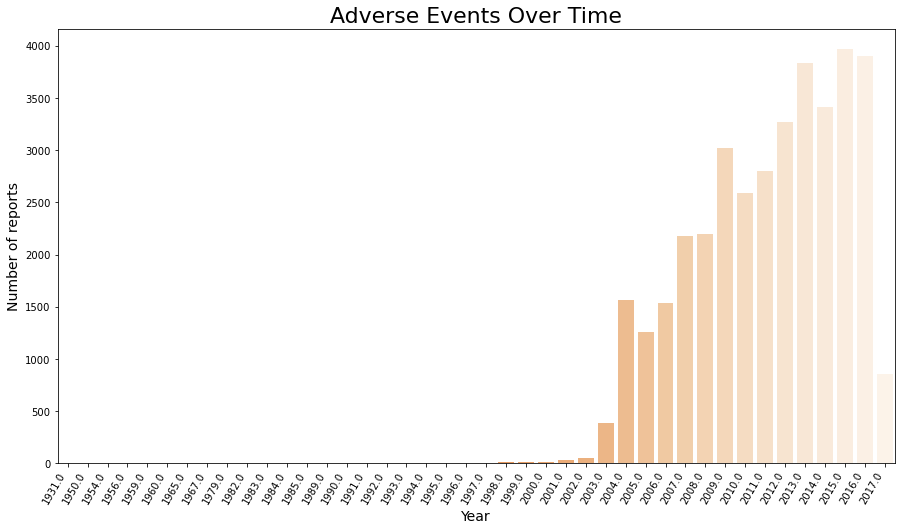

In [19]:
years_data = df['year'].value_counts()
years_index = years_data.index  
years_values = years_data.values
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60, ha='right')
plt.title('Adverse Events Over Time', fontsize=22)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
years_plot = sns.barplot(x=years_index,y=years_values, palette = "Oranges_r")

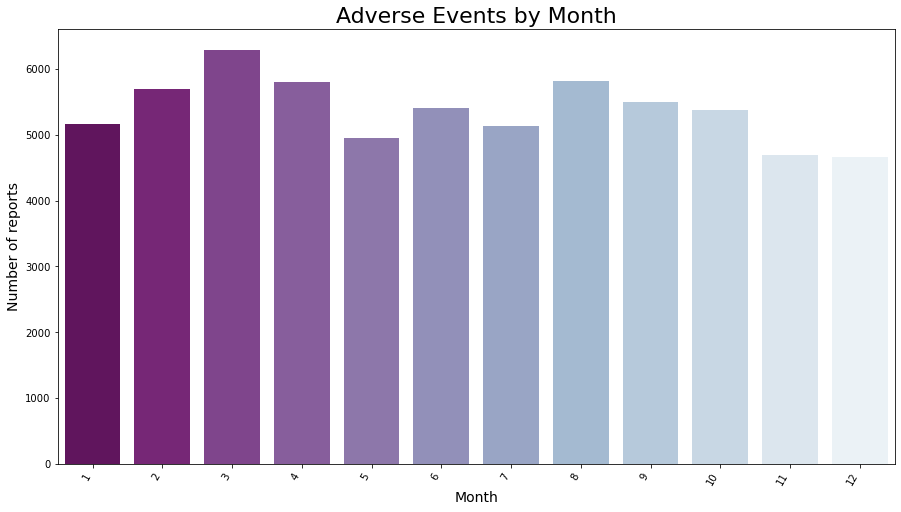

In [21]:
month_data = df['month'].value_counts()
month_index = month_data.index  
month_values = month_data.values
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60, ha='right')
plt.title('Adverse Events by Month', fontsize=22)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
years_plot = sns.barplot(x=month_index,y=month_values, palette = "BuPu_r")

## Question 5: What is the gender distribution of the reports?

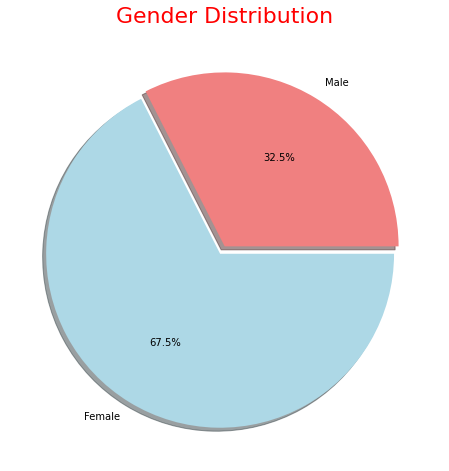

In [22]:
male = df.loc[df['CI_Gender']=='Male'].count()[0]
female = df.loc[df['CI_Gender']=='Female'].count()[0]

labels = ['Male', 'Female']
explode = [0 ,0.05]
colors = ['lightcoral', 'lightblue']
plt.figure(figsize=(12,8))
plt.pie([male, female], autopct='%1.1f%%', shadow=True, explode=explode, colors=colors, labels=labels)
plt.title('Gender Distribution', size=22, color='red')


plt.show()

## Question 6: What are the most reported brands/products?

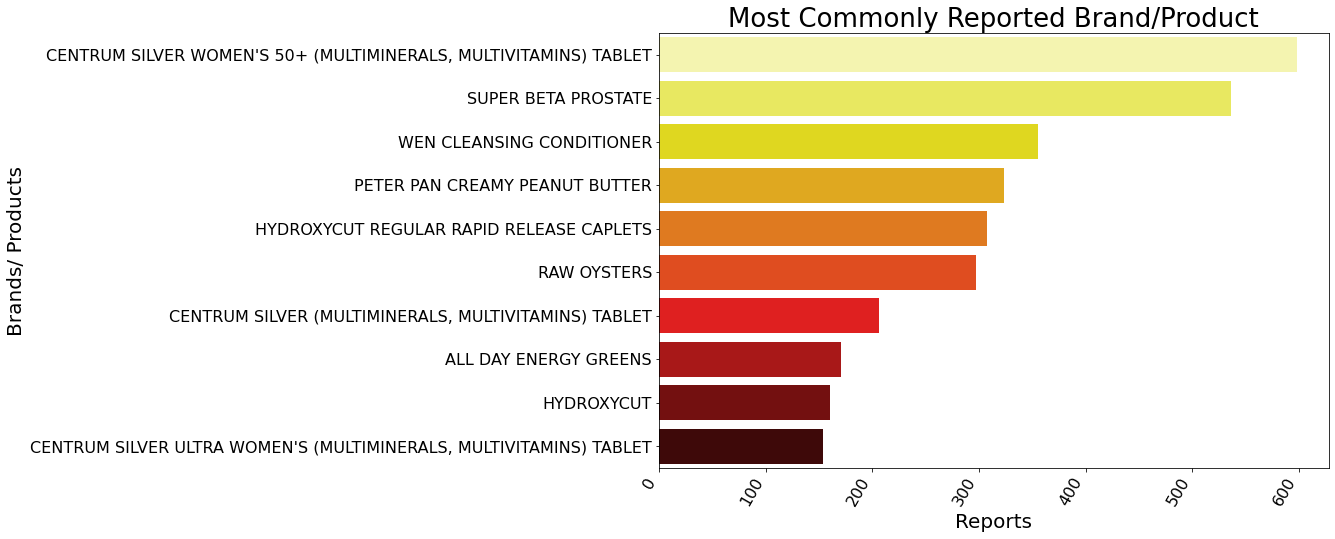

In [23]:
brand_data = df['PRI_Reported Brand/Product Name'].value_counts()
brand_index = brand_data.index  
brand_values = brand_data.values
plt.figure(figsize=(12,8))
plt.xticks(rotation = 60, ha='right', size=16)
plt.yticks(size=16)
plt.title('Most Commonly Reported Brand/Product', fontsize=26)
plt.xlabel("Reports", fontsize=20)
plt.ylabel("Brands/ Products", fontsize=20)
brand_plot = sns.barplot(x=brand_values[1:11],y=brand_index[1:11], palette = "hot_r", orient='h')

## Question 7: What's the relation between Ovarian Cancer and industry?

In [25]:
cancer_df = df[(df["SYM_One Row Coded Symptoms"]=="OVARIAN CANCER")]


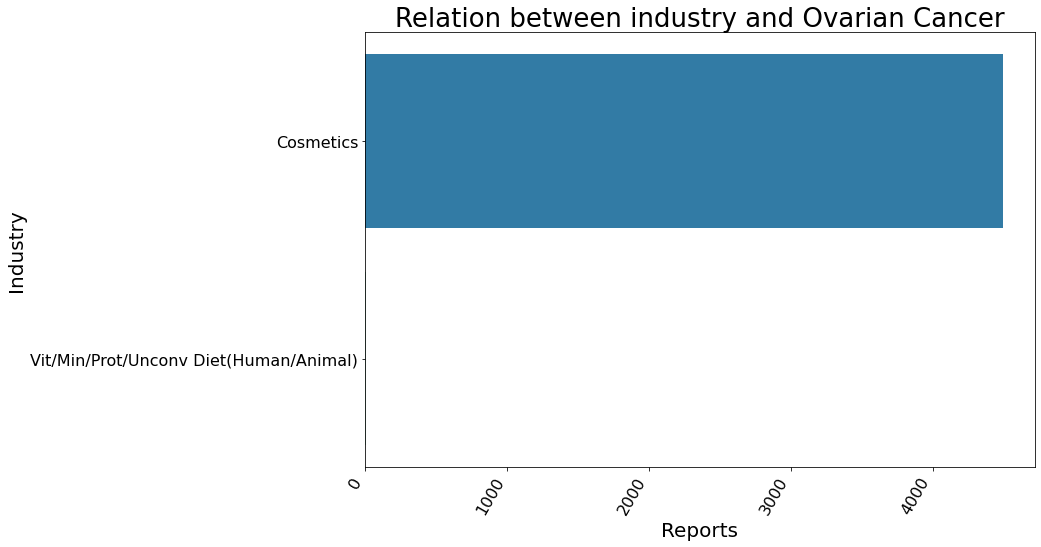

In [31]:
industry_data = cancer_df['PRI_FDA Industry Name'].value_counts().sort_values(ascending=False)
industry_index = industry_data.index  
industry_values = industry_data.values
plt.figure(figsize=(12,8))
plt.xticks(rotation = 60, ha='right', size=16)
plt.yticks(size=16)
plt.title('Relation between industry and Ovarian Cancer', fontsize=26)
plt.xlabel("Reports", fontsize=20)
plt.ylabel("Industry", fontsize=20)
brand_plot = sns.barplot(x=industry_values,y=industry_index, palette = "YlGnBu_r", orient='h')

## Question 8: What is the relations between deaths and industry?

In [32]:
death_df = df[(df["AEC_One Row Outcomes"]=="DEATH")]

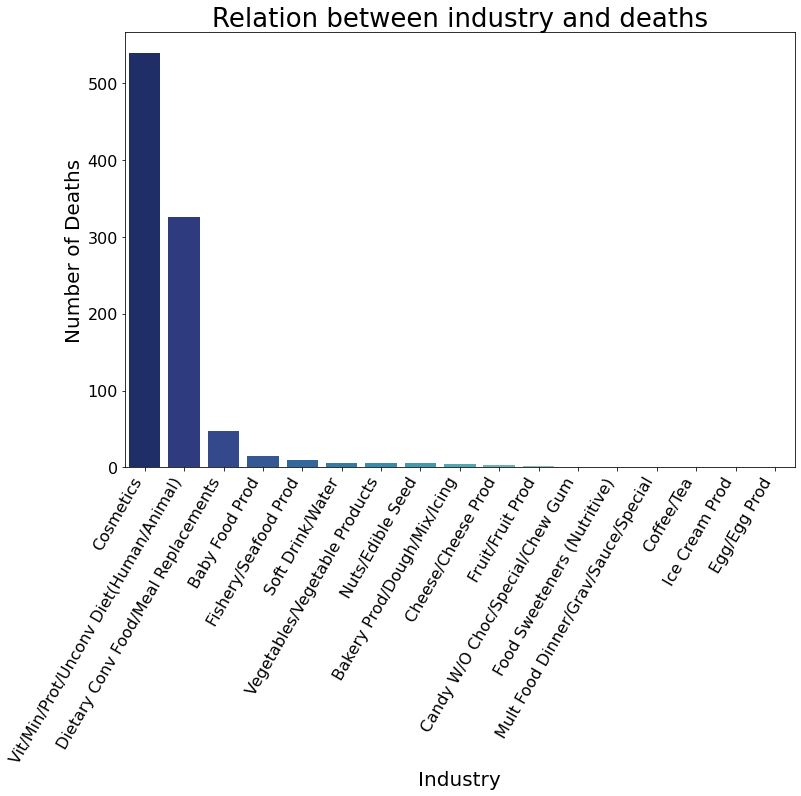

In [34]:
ind_data = death_df['PRI_FDA Industry Name'].value_counts()
ind_index = ind_data.index  
ind_values = ind_data.values
plt.figure(figsize=(12,8))
plt.xticks(rotation = 60, ha='right', size=16)
plt.yticks(size=16)
plt.title('Relation between industry and deaths', fontsize=26)
plt.xlabel("Industry", fontsize=20)
plt.ylabel("Number of Deaths", fontsize=20)
industry_plot = sns.barplot(x=ind_index,y=ind_values, palette = "YlGnBu_r")

## Question 9: What is the relation between disbility and industry?

In [35]:
dis_df = df[(df["AEC_One Row Outcomes"]=="DISABILITY")]


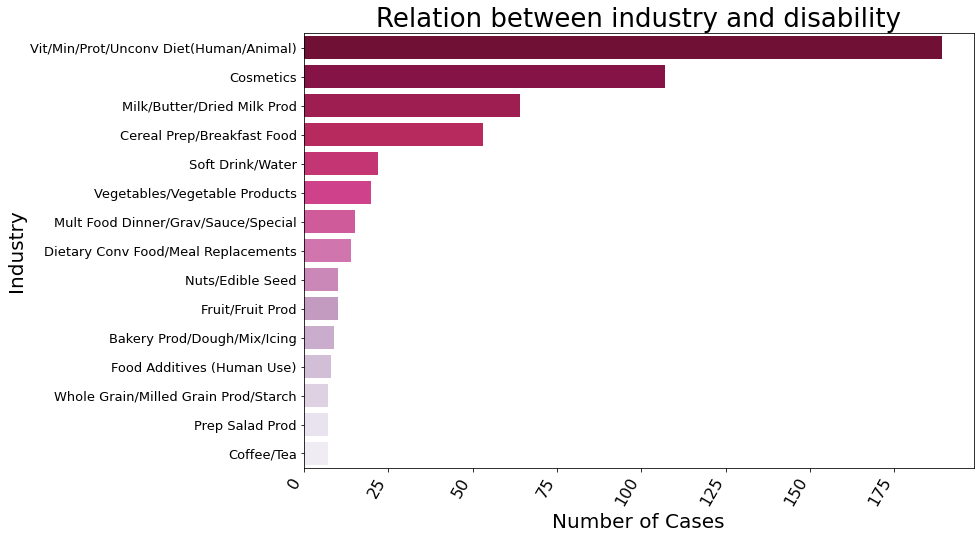

In [36]:
dis_data = dis_df['PRI_FDA Industry Name'].value_counts()
dis_index = dis_data.index  
dis_values = dis_data.values
plt.figure(figsize=(12,8))
plt.xticks(rotation = 60, ha='right', size=16)
plt.yticks(size=13)
plt.title('Relation between industry and disability', fontsize=26)
plt.xlabel("Number of Cases", fontsize=20)
plt.ylabel("Industry", fontsize=20)
industry_plot = sns.barplot(x=dis_values[:15],y=dis_index[:15], palette = "PuRd_r", orient='h')

## Death by gender

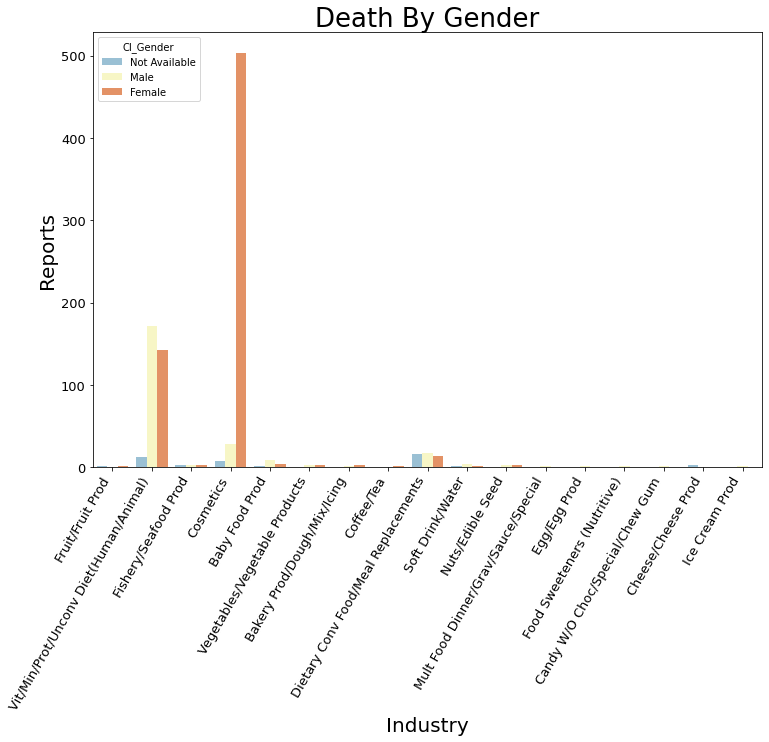

In [38]:
plt.figure(figsize=(12,8))
gender_death_plot = sns.countplot(death_df['PRI_FDA Industry Name'],hue=death_df['CI_Gender'], palette='RdYlBu_r')

plt.xticks(rotation = 60, ha='right', size=13)
plt.yticks(size=13)
plt.title('Death By Gender', fontsize=26)
plt.xlabel("Industry", fontsize=20)
plt.ylabel("Reports", fontsize=20)
plt.show()

## Disability by gender

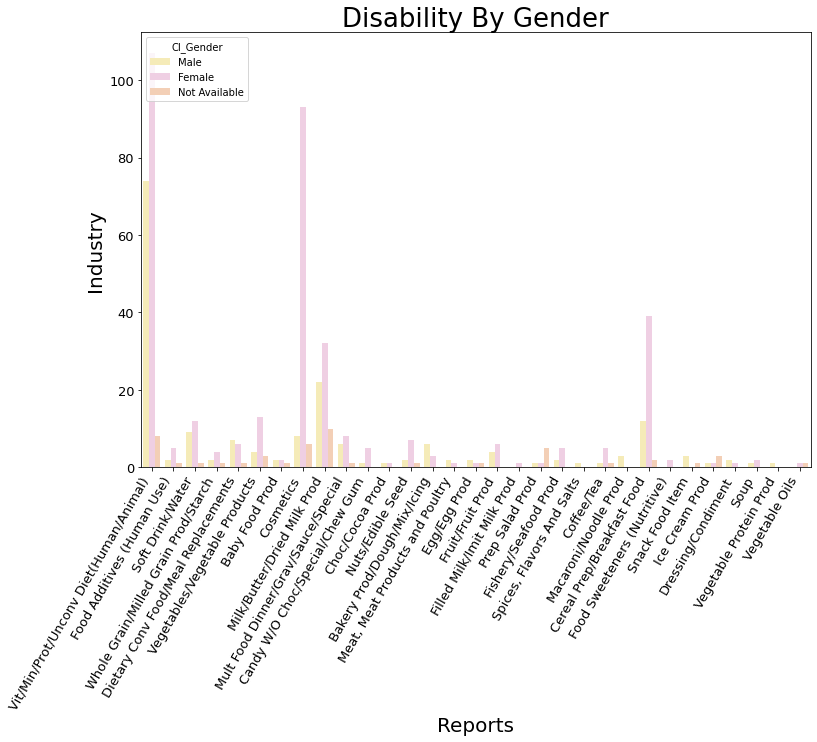

In [39]:
plt.figure(figsize=(12,8))
gender_dis_plot = sns.countplot(dis_df['PRI_FDA Industry Name'],hue=dis_df['CI_Gender'], palette='Pastel2_r')

plt.xticks(rotation = 60, ha='right', size=11)
plt.yticks(size=13)
plt.title('Disability By Gender', fontsize=26)
plt.xlabel("Reports", fontsize=20)
plt.ylabel("Industry", fontsize=20)
plt.show()